<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB


None

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05


Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64

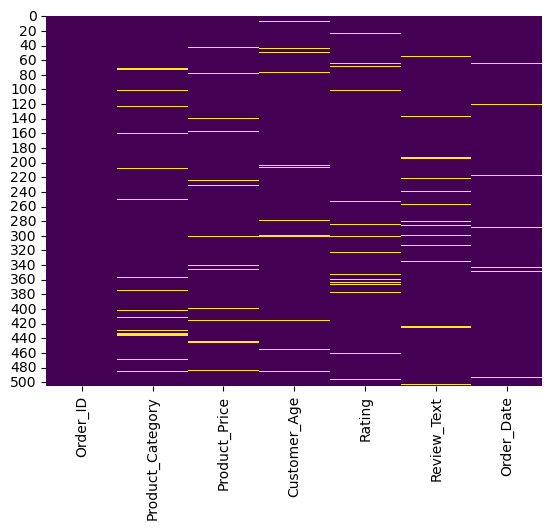

ValueError: 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\madha\Downloads\Day 19_E-Commerce_Data.csv")

display(df.info())
display(df.head())

missing_percentage = df.isna().mean() * 100
display(missing_percentage)

sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.show()

num_imputer = SimpleImputer(strategy="median")
df["Product_Price"] = num_imputer.fit_transform(df[["Product_Price"]])

cat_imputer = SimpleImputer(strategy="most_frequent")
df["Product_Category"] = cat_imputer.fit_transform(df[["Product_Category"]])

df["Order_Date"] = df["Order_Date"].fillna(method="ffill")

knn_imputer = KNNImputer(n_neighbors=5)
df.iloc[:, :] = knn_imputer.fit_transform(df)

display(df.describe())

df.to_csv("cleaned_ecommerce_orders.csv", index=False)
display(df.head())
